In [38]:
import uproot
import numpy as np
import pandas as pd

index       = [ "B_sig_K_dr","B_sig_K_dz","B_sig_CleoConeCS_3_ROE", "thrustAxisCosTheta","aplanarity","sphericity",
                "harmonicMomentThrust0","harmonicMomentThrust1","harmonicMomentThrust2","harmonicMomentThrust3","harmonicMomentThrust4",
                "foxWolframR1","foxWolframR2","foxWolframR3","foxWolframR4", "B_sig_isSignalAcceptMissingNeutrino"]

data        = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_3_GeV_100000_events_nobdtcut.root:tree_Bsig;1").arrays(index, library ="pd")
charged     = uproot.open('/ceph/aavocone/Data/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16812.root:tree_Bsig;1').arrays(index, library ="pd")
mixed       = uproot.open('/ceph/aavocone/Data/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16817.root:tree_Bsig;1').arrays(index, library ="pd")
uu          = uproot.open('/ceph/aavocone/Data/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16802.root:tree_Bsig;1').arrays(index, library ="pd")
cc          = uproot.open('/ceph/aavocone/Data/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16792.root:tree_Bsig;1').arrays(index, library ="pd")
dd          = uproot.open('/ceph/aavocone/Data/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16797.root:tree_Bsig;1').arrays(index, library ="pd")
ss          = uproot.open('/ceph/aavocone/Data/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16807.root:tree_Bsig;1').arrays(index, library ="pd")

sets =[data,charged,mixed,uu,cc,dd,ss]
l=0
for i,v in enumerate(sets):
    if i==0:
        v["signal"]  = np.ones(len(v))
        
    else:
        v["signal"] = np.zeros(len(v))
    v["class"] = np.ones(len(v))*i
    l += len(v)
data.drop(data[data["B_sig_isSignalAcceptMissingNeutrino"]==0.0].index, inplace = True)
df = pd.concat(sets)

df.to_hdf("/ceph/aavocone/large_set.h5", key = "df", mode="w")

KeyboardInterrupt: 

In [27]:
import uproot
import numpy as np
import pandas as pd

In [37]:
%timeit pd.read_hdf("/work/aavocone/small_set.h5", "df")


99.8 ms ± 513 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%timeit pd.read_csv("/work/aavocone/small_set.csv", "df")

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/IPython/core/magics/execution.py:156: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  timing = self.inner(it, self.timer)
<magic-timeit>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/IPython/core/magics/execution.py:156: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  timing = self.inner(it, self.timer)
<magic-timeit>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are inter

1.74 s ± 285 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
d = pd.read_hdf("/ceph/aavocone/small_set.h5", "df")
d.head()

,B_sig_K_dr,B_sig_K_dz,B_sig_CleoConeCS_3_ROE,thrustAxisCosTheta,aplanarity,sphericity,harmonicMomentThrust0,harmonicMomentThrust1,harmonicMomentThrust2,harmonicMomentThrust3,harmonicMomentThrust4,foxWolframR1,foxWolframR2,foxWolframR3,foxWolframR4,B_sig_isSignalAcceptMissingNeutrino,signal,class
1,0.000552,0.008028,0.445176,0.498632,0.053778,0.205663,0.464890,-0.126368,0.256069,-0.101066,0.110505,0.077050,0.305915,0.092510,0.132576,1.0,1.0,0.0
3,0.001343,-0.014574,0.000000,0.473281,0.103204,0.663744,0.589003,0.106267,0.147611,0.015014,-0.137382,0.046688,0.103698,0.199442,0.185047,1.0,1.0,0.0
5,0.000129,0.022679,0.000000,0.346607,0.063516,0.257290,0.613247,-0.201901,0.391176,-0.075176,0.276585,0.115278,0.425441,0.090597,0.341252,1.0,1.0,0.0
6,0.005222,-0.009289,1.337033,0.349583,0.057221,0.189610,0.557323,0.190926,0.300948,0.122741,0.198388,0.124327,0.315764,0.154302,0.281017,1.0,1.0,0.0
8,0.006154,0.012580,0.000000,0.484741,0.072856,0.445161,0.622265,0.140176,0.167440,0.168989,0.003366,0.061527,0.124156,0.167941,0.215300,1.0,1.0,0.0


## Signal efficiency


In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import functions as fc
from sklearn.model_selection import train_test_split

df = pd.read_csv("/work/aavocone/small_set.csv")

#test train split
X = df[df.columns[:-3]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
indicies = df["class"]

xtrain,xtest,ytrain,ytest= train_test_split(X, y, test_size = 0.33, stratify = y)

xtrain,xval,ytrain,yval= train_test_split(xtrain, ytrain,  test_size = 0.5, stratify= ytrain)



#to long 3m




In [11]:
model = xgb.XGBClassifier()
model.load_model("/work/aavocone/models/model500.txt")
yprob = model.predict_proba(xtest)[:,1]

sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest)

In [12]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=128,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=7015.748267550467,
              subsample=1, tree_method='auto', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [13]:
def efficiency(yprob,ytest):
    bin_edges = np.linspace(0,1,101)
    s_eff = []
    b_eff = []

    #----------------SIGNAL..............................................
    #hist 
    s_hist= yprob*ytest 
    s_hist = s_hist[s_hist!=0]      #overwrites s_hist with an array with no 0 values
    counts,_ = np.histogram(yprob,bins = bin_edges)
    for i in range(len(bin_edges)):
        s_eff.append(sum(counts[i:])/sum(counts))
    s_eff = np.array(s_eff)


    #----------------BACKGROUND.............................................
    #hist 
    b_hist = yprob*(1-ytest)
    b_hist = b_hist[b_hist != 0]     #removes the 0 values

    #efficiency
    counts,_ = np.histogram(1-yprob,bins = bin_edges)
    
    for i in range(len(bin_edges)):
        b_eff.append(sum(counts[i:])/sum(counts))
    b_eff = np.array(b_eff)
    return s_hist, b_hist,s_eff, b_eff, bin_edges

In [14]:
sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest)
sh_new,bh_new,s_new,b_new,_ = efficiency(yprob,ytest)

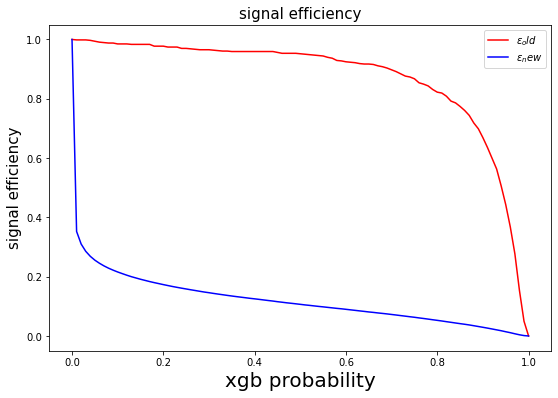

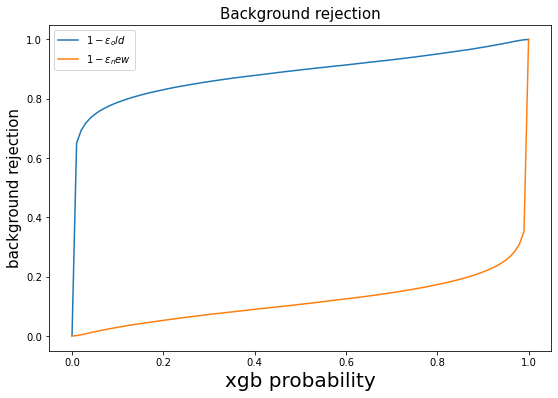

In [15]:
plt.figure(figsize=(9,6))
plt.plot(bin_edges, s, label = "$\epsilon_old$", color = "r")
plt.plot(bin_edges, s_new, label = "$\epsilon_new$", color = "b")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency",fontsize=15)
plt.title(f"signal efficiency", fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize=(9,6))
plt.plot(bin_edges, 1-b, label = "$1-\epsilon_old$")
plt.plot(bin_edges, 1-b_new, label = "$1-\epsilon_new$")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection", fontsize = 15)
plt.legend()
plt.show() 

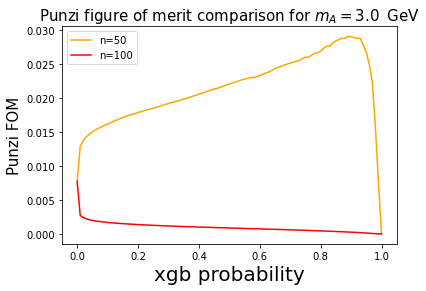

In [16]:
def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)

bin_edges = np.linspace(0,1,101)

plt.plot(bin_edges, PFOM(s,b,bh,5), label = "n=50", color ="orange")
plt.plot(bin_edges, PFOM(s_new,b_new,bh_new,5), label = "n=100", color ="r")
plt.title("Punzi figure of merit comparison for $m_A = 3.0\:$ GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()

plt.show()